In [1]:
import pickle

# https://github.com/RaRe-Technologies/gensim
import gensim
from gensim.models import CoherenceModel, LdaModel, Phrases
from gensim.corpora import Dictionary

# https://github.com/bmabey/pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import math

In [2]:
TOKEN_NO_BELLOW_FREQ   = 10 # sachant qu'il y a plus de 100 000 documents
TOKEN_NO_ABOVE_PERCENT = 0.3

In [3]:
with (open("_outputs/tokens_transports.pickle", "rb")) as openfile:
    texts = pickle.load(openfile)

In [4]:
len(texts)

2230

In [5]:
bigram = gensim.models.Phrases(texts, min_count=10)

In [6]:
texts = [bigram[line] for line in texts]

In [7]:
texts[12]

['féministe',
 'pls',
 'transporteur',
 'imagine',
 'polémique',
 'genre',
 'scène',
 'sortir',
 'heure',
 'envoy',
 'especial',
 'transport',
 'eur',
 'tfx',
 'pmp',
 'fram',
 'post',
 'quotidien']

In [8]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(texts)

# Filter out words that occur less than TOKEN_NO_BELLOW_FREQ documents, 
# or more than TOKEN_NO_ABOVE_PERCENT% of the documents.
dictionary.filter_extremes(no_below=TOKEN_NO_BELLOW_FREQ, no_above=TOKEN_NO_ABOVE_PERCENT)

In [9]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in texts]

In [10]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 397
Number of documents: 2230


In [11]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [12]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=12, step=2)

Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

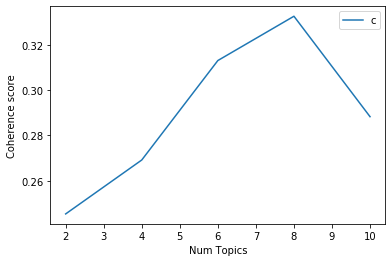

In [13]:
# Show graph
import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

In [21]:
def make_model(nb_topics):
    # Set training parameters.
    chunksize = 5000
    passes = 20
    iterations = 1000
    eval_every = 1  # Don't evaluate model perplexity, takes too much time.
    ldamodel = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                           alpha='auto', eta='auto', \
                           iterations=iterations, num_topics=nb_topics, \
                           passes=passes, eval_every=eval_every)
    p = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
    pyLDAvis.save_html(p, 'graphs/transport_save_{}_LDA.html'.format(nb_topics))
    print('Topic done n°{}'.format(nb_topics))
    return ldamodel

In [30]:
model = make_model(8)

Topic done n°8


In [31]:
def cloud_topic(nb, model):
    topic_stats = dict(model.show_topic(nb, 100))
    wordcloud = WordCloud(max_words=100, background_color="white").fit_words(topic_stats)
    fig, ax = plt.subplots()
    fig.dpi = 150
    fig.set_size_inches(7, 5)
    ax = plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

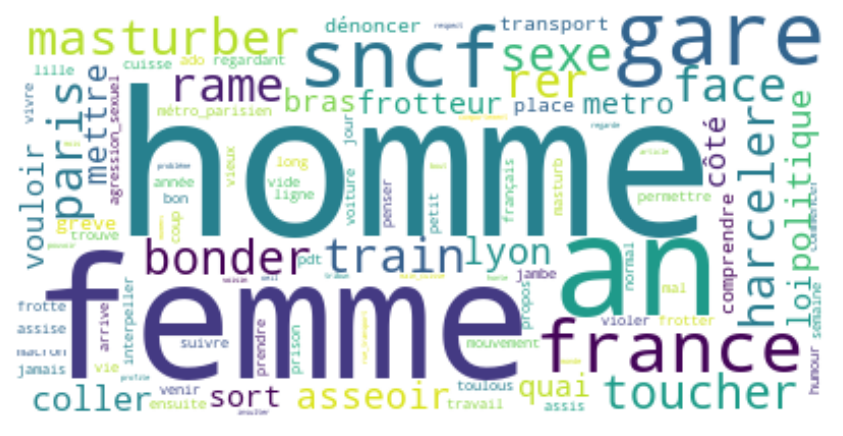

In [32]:
cloud_topic(0, model)

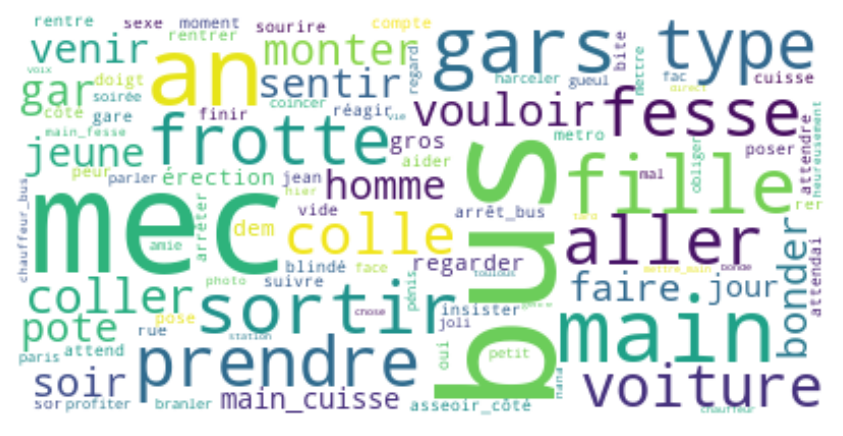

In [33]:
cloud_topic(1, model)

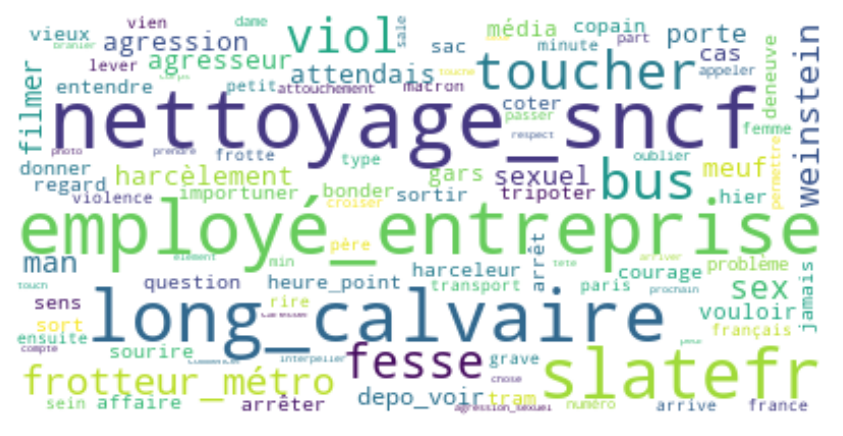

In [34]:
cloud_topic(2, model)

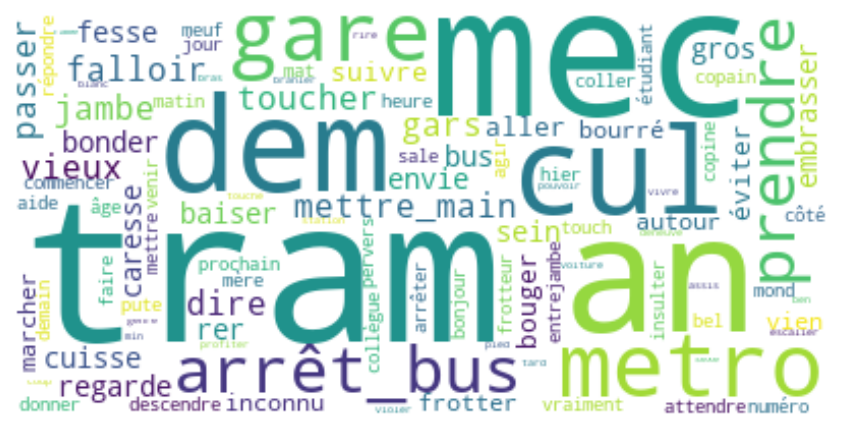

In [35]:
cloud_topic(3, model)

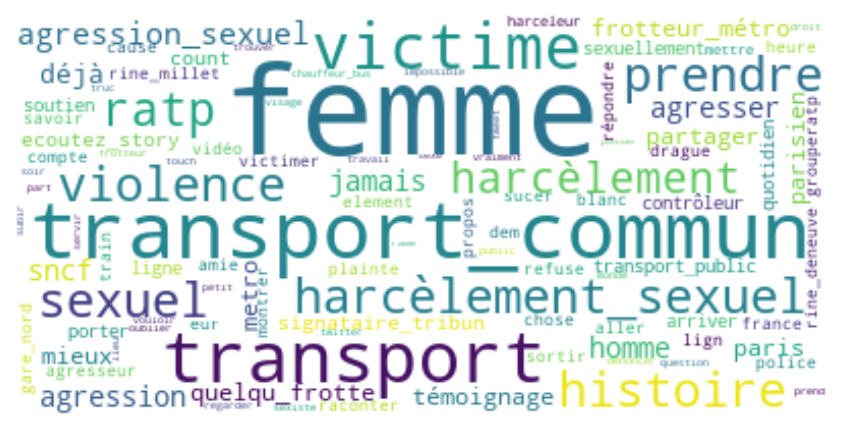

In [36]:
cloud_topic(4, model)

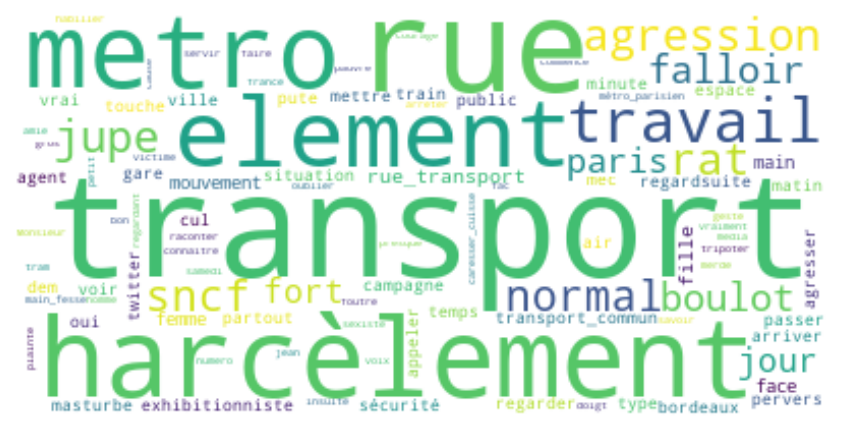

In [37]:
cloud_topic(5, model)

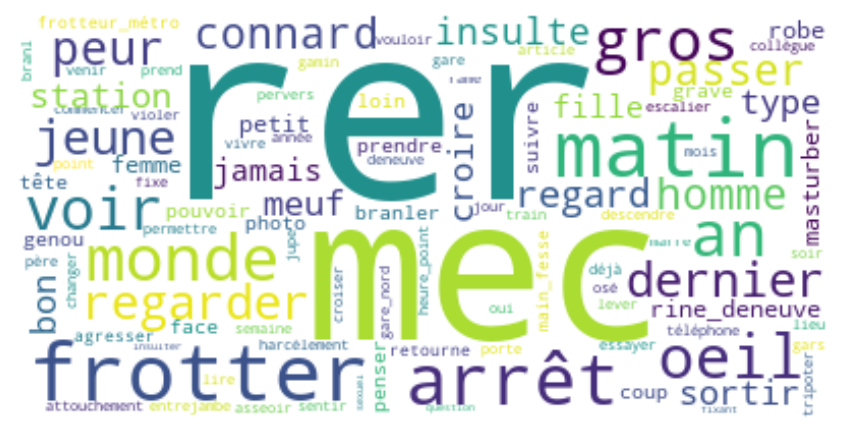

In [38]:
cloud_topic(6, model)

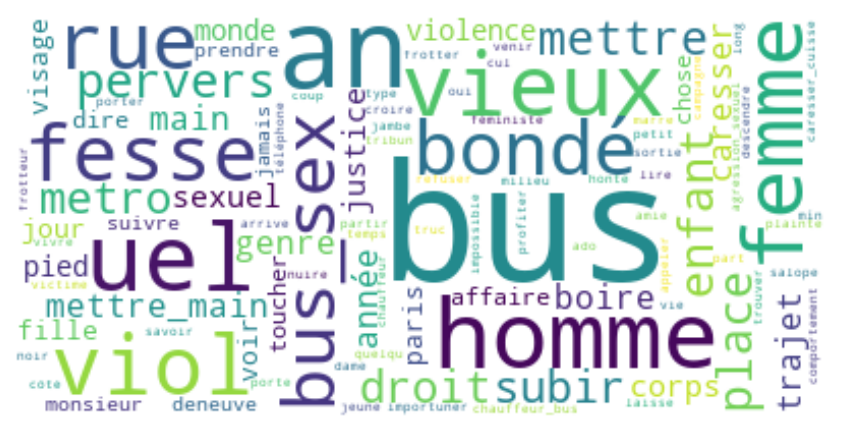

In [39]:
cloud_topic(7, model)